**Install and import cirq**

In [1]:
# !pip install --upgrade
!pip install cirq
import cirq
import numpy as np

**Create Moments for circuit**

In [2]:
qubits = cirq.GridQubit.square(2)

x_op = cirq.X(qubits[0])
x_moment = cirq.Moment(x_op)
print(x_moment)

cnot_op = cirq.CNOT(qubits[1], qubits[2])
cnot_moment = cirq.Moment(cnot_op)
print(cnot_moment)

first_moment = cirq.Moment(x_op, cnot_op) # equals to x_moment + cnot_moment
print(first_moment)

circuit = cirq.Circuit([first_moment])
print(circuit)

  ╷ 0
╶─┼───
0 │ X
  │
  ╷ 0 1
╶─┼─────
0 │ ┌─@
  │ │
1 │ X
  │
  ╷ 0 1
╶─┼─────
0 │ X─@
  │ │
1 │ X
  │
(0, 0): ───X───

(0, 1): ───@───
           │
(1, 0): ───X───


**Insert another moment**

In [3]:
second_moment = cirq.Moment([cirq.H(qubits[0]),
                             cirq.measure(qubits[2], qubits[3])])
print(second_moment)
circuit.append(second_moment)
print(circuit)

  ╷ 0 1
╶─┼─────
0 │ H
  │
1 │ M─M
  │
(0, 0): ───X───H───

(0, 1): ───@───────
           │
(1, 0): ───X───M───
               │
(1, 1): ───────M───


**Display circuit diagram**

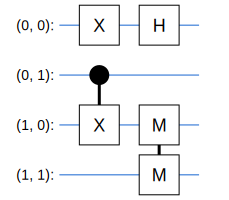

In [4]:
from cirq.contrib.svg import SVGCircuit
SVGCircuit(circuit)